In [1]:
from sklearn.datasets import load_iris

Data = load_iris()
print(dir(Data))
print(Data.feature_names)
print(Data.target_names)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [2]:
import pandas as pd

File = pd.DataFrame(Data.data,columns=Data.feature_names)
File['Target'] = Data.target
File['Flower_name'] = File['Target'].apply(lambda x: Data.target_names[x])
File.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
Data0 = File[File.Target == 0]
Data1 = File[File.Target == 1]
Data2 = File[File.Target == 2]
Data2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


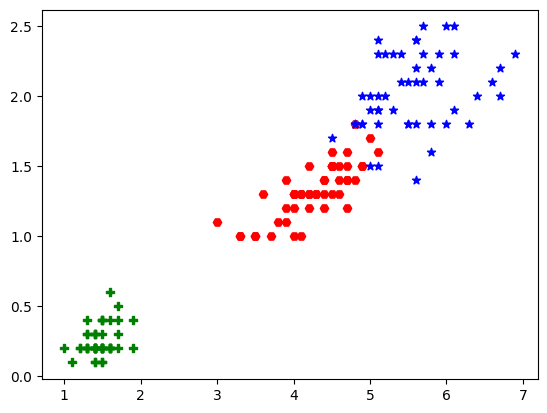

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Data0['petal length (cm)'],Data0['petal width (cm)'],color='green',marker='P')
plt.scatter(Data1['petal length (cm)'],Data1['petal width (cm)'],color='red',marker='H')
plt.scatter(Data2['petal length (cm)'],Data2['petal width (cm)'],color='blue',marker='*')
plt.show()

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = File.drop(['Target','Flower_name'],axis='columns')
Y = File['Target']

X_train , X_test , y_train  , y_test =train_test_split(X,Y,test_size=0.2,random_state=3)
Model = SVC()
Model.fit(X_train,y_train)
print(X_train)
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
14                 5.8               4.0                1.2               0.2
24                 4.8               3.4                1.9               0.2
139                6.9               3.1                5.4               2.1
58                 6.6               2.9                4.6               1.3
8                  4.4               2.9                1.4               0.2
..                 ...               ...                ...               ...
107                7.3               2.9                6.3               1.8
21                 5.1               3.7                1.5               0.4
0                  5.1               3.5                1.4               0.2
131                7.9               3.8                6.4               2.0
106                4.9               2.5                4.5               1.7

[120 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

In [5]:
print(Model.predict(X_train))
print(Model.predict(X_test))

[0 0 2 1 0 0 2 0 2 1 2 1 0 0 2 1 0 2 2 1 0 0 2 1 1 0 2 0 2 1 0 0 2 1 0 0 1
 2 2 0 2 1 0 0 2 2 2 1 1 1 0 0 2 2 1 2 1 2 0 2 0 1 1 2 2 0 1 0 1 1 1 0 2 0
 2 1 2 1 2 1 0 2 1 2 1 0 1 2 0 1 0 0 0 1 2 0 0 2 0 1 2 1 2 2 1 1 2 1 0 1 1
 0 1 2 1 2 0 0 2 1]
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 1 2 2 1 0 2 2 1 1 1]


In [6]:
Model.predict([[6.1,2.6,5.6,1.4]])

C:\Users\Shree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])